# <span style="color:#3498db">**Multiviariate TFR statistics, a mini-tutorial**</span>

To run the [notebook](https://github.com/nicogravel/tfrStats/blob/main/docs/html/notebooks/multivariate_tfr_stats.ipynb), clone the package (or your fork) locally and then:

## Compute RDM reliability using permutations 

In [1]:
import os
import numpy as np
from tfrStats.load_tfr_rdm import load_tfr_rdm as load_tfr_rdm
from tfrStats.mvtfr_reliability import mvtfr_reliability as mvtfr_reliability  

fbands  = ['low','high','higher','mua']
blocks   = ['grat', 'nat','obj','bck']

example_data = '/Users/nicogravel/Documents/Websites/tfrStats/tfrStats_local/docs/source/notebooks/example_data/'

# Loop over blocks and frequency bands
for  block in range(2,3):
    for  fband in range(3):

        # Configure inputs
        conf = {
            'paths'    : [
            '/Users/nicogravel/Documents/Gandalf/MWlamprop/data/results_bckp/',
            # '/mnt/hpc_slurm/projects/MWlamprop/Analysis/02_data/spectral_dec/'
            #'/mnt/hpc/projects/MWlamprop/Analysis/02_data/preprocessed/',
            #'/mnt/pns/home/graveln/Documents/MWlamprop/results/spectral_dec/',
            #'/mnt/hpc/projects/MWlamprop/Analysis/02_data/spectral_dec/',
            '/Volumes/Gandalf/MWlamprop/data/',
            #'/Users/nicogravel/Documents/Gandalf/MWlamprop/data/results_bckp/',
            #'/Users/nicogravel/Documents/Gandalf/MWlamprop/data/processed/spectral_dec/',
            '/Volumes/Gandalf/MWlamprop/results/'
            ],
            'methods'  : ['spectral','mvpa'],
            'decvars'  : ['spw','gpr','spwgpr'],
            'method'   : 1,
            'dvar'     : 0,
            'fband'    : fband,
            'cond'     : block,
            'sess'     : 0,
            'layers'   : False,
            'lump'     : True,
            'rsa'      : True,
            'n_perm'   : 2
            }

        # Load data
        rdms  = load_tfr_rdm(conf)

        rdm1 = rdms['rdm_split1']
        rdm2 = rdms['rdm_split2']
        rdm  = rdms['rdm_whole']
        print(rdm.shape) 

        # Compute reliability
        tfr, tfr_null = mvtfr_reliability(rdms,conf)

        # Prepare outputs
        tfrs = {
                'tfr'  : tfr,
                'tfr_null'  : tfr_null,
            }

        # Save outputs
        fname = os.path.join(example_data + 'mvtfr_'
                    + blocks[block] + '_' 
                    + fbands[fband]
                    + '.npy') 
        print(fname)
        np.save(fname,tfrs) 


session:  0
(12, 19, 36, 36, 57)
(12, 19, 36, 36, 57)
/Users/nicogravel/Documents/Websites/tfrStats/tfrStats_local/docs/source/notebooks/example_data/mvtfr_obj_low.npy
session:  0
(12, 16, 36, 36, 113)
(12, 16, 36, 36, 113)
/Users/nicogravel/Documents/Websites/tfrStats/tfrStats_local/docs/source/notebooks/example_data/mvtfr_obj_high.npy
session:  0
(12, 11, 36, 36, 141)
(12, 11, 36, 36, 141)
/Users/nicogravel/Documents/Websites/tfrStats/tfrStats_local/docs/source/notebooks/example_data/mvtfr_obj_higher.npy


In [2]:
import numpy as np

# Save outputs
fname = os.path.join(example_data + 'mvtfr_'
            + blocks[block] + '_' 
            + fbands[fband]
            + '.npy') 
print(fname)
np.save(fname,tfrs) 

/Users/nicogravel/Documents/Websites/tfrStats/tfrStats_local/docs/source/notebooks/example_data/mvtfr_obj_higher.npy


## Plot RDM reliability 

Similarly to the problem of taking the extreme values at each iteration of the permutaion when computing univariate TFRs. Whern computing multivariate TFRs, one is confronted with the decisio of whether to take the extreme value or the average. 

(16, 113)
(20, 16, 113)
dimensions : (16, 113) (20, 12, 16, 113) (20, 16, 113)
(16, 113)
(20, 12, 113)
dimensions : (16, 113) (20, 12, 16, 113) (20, 12, 113)
(16, 113)
(20, 113)
dimensions : (16, 113) (20, 12, 16, 113) (20, 113)


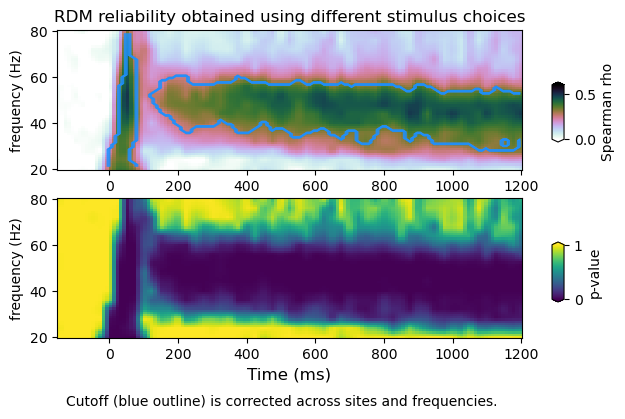

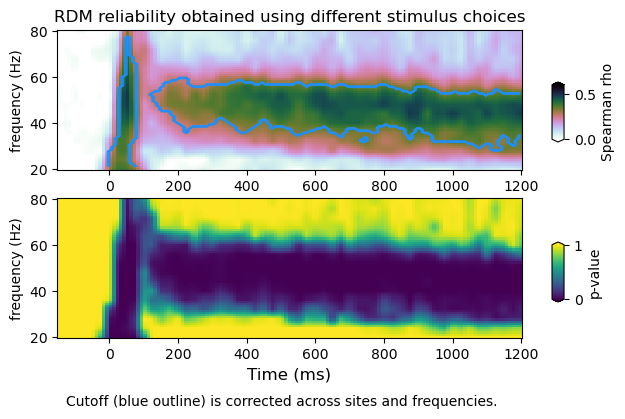

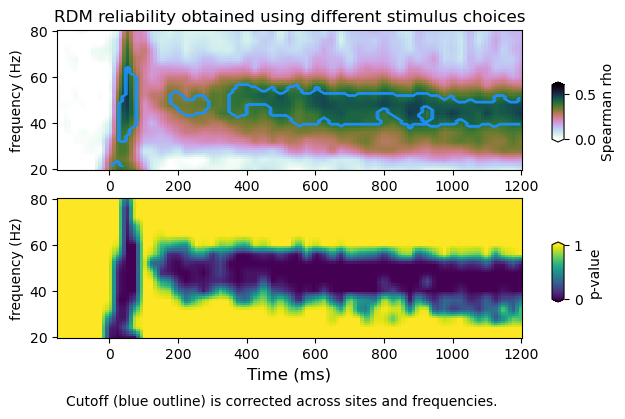

In [3]:
import numpy as np
from tfrStats.plot_mvtfr_stats import plot_mvtfr_stats as plot_mvtfr_stats

fband         = 1
fname = str(example_data + 'mvtfr_example_high.npy')
tfrs = np.load(fname,allow_pickle=True).item()
tfr = tfrs['tfrs']
tfr_null = tfrs['tfrs_null']

plot_mvtfr_stats(tfr, tfr_null, fband, alpha = 0.05, correction='space')
plot_mvtfr_stats(tfr, tfr_null, fband, alpha = 0.05, correction='frequency')
plot_mvtfr_stats(tfr, tfr_null, fband, alpha = 0.05, correction='space-frequency')

(12, 16, 113)
(20, 12, 16, 113)
peak frequency range :  40.0 56.0
power average within peak: 0.4162180721230189
(12, 113)
null: (20, 12, 4, 113)
(20, 4, 113)
dimensions : (12, 113) (20, 12, 4, 113) (20, 4, 113)
(12, 16, 113)
(20, 12, 16, 113)
peak frequency range :  40.0 56.0
power average within peak: 0.4162180721230189
(12, 113)
null: (20, 12, 4, 113)
(20, 113)
dimensions : (12, 113) (20, 12, 4, 113) (20, 113)


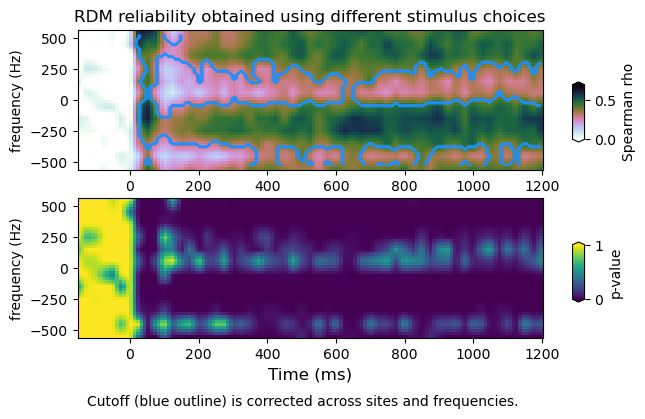

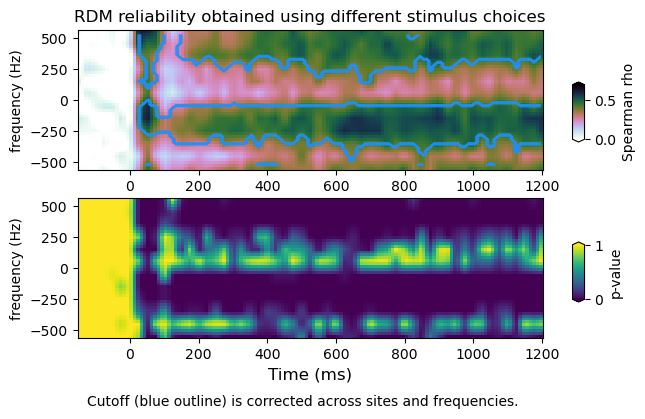

In [4]:
import numpy as np
from tfrStats.plot_dmvtfr_stats import plot_dmvtfr_stats as plot_dmvtfr_stats

fband         = 1
fname = str(example_data + 'mvtfr_example_high.npy')
tfrs = np.load(fname,allow_pickle=True).item()
tfr_emp = tfrs['tfrs']
tfr_null = tfrs['tfrs_null']

plot_dmvtfr_stats(tfr_emp, tfr_null, fband, alpha = 0.05, correction='space')
#plot_dmvtfr_stats(tfr_emp, tfr_null, fband, alpha = 0.05, correction='frequency')
plot_dmvtfr_stats(tfr_emp, tfr_null, fband, alpha = 0.05, correction='space-frequency')